<a href="https://colab.research.google.com/github/Ilmaj17/Car-Price-Prediction-using-Linear-Regression/blob/main/Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Prediction Model using Linear Regression


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#matplotlib inline

## Import the dataset

In [170]:
path = "/content/drive/My Drive/Data Sets/data.csv"
df = pd.read_csv(path)
len(df)

11914

In [171]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [172]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

### Removing the inconsistencies of the Column Names by lowercasing them and replacing spaces with underscores.

In [173]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

### Analysing the target variable y (msrp)

<Axes: xlabel='msrp', ylabel='Count'>

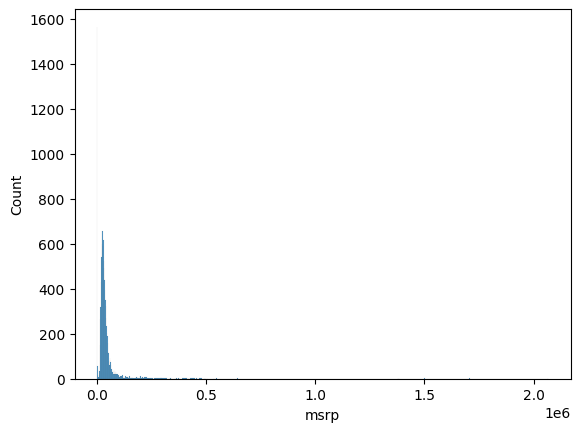

In [174]:
sns.histplot(df['msrp'])

<Axes: xlabel='msrp', ylabel='Count'>

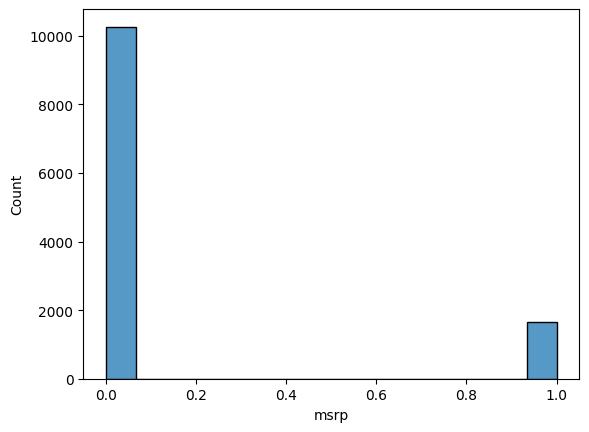

In [175]:
sns.histplot(df['msrp']<10000)

### The distribution has a long tail. So it is difficult to interpret the result. So we take the log transformation of the target variable y.

<Axes: xlabel='msrp', ylabel='Count'>

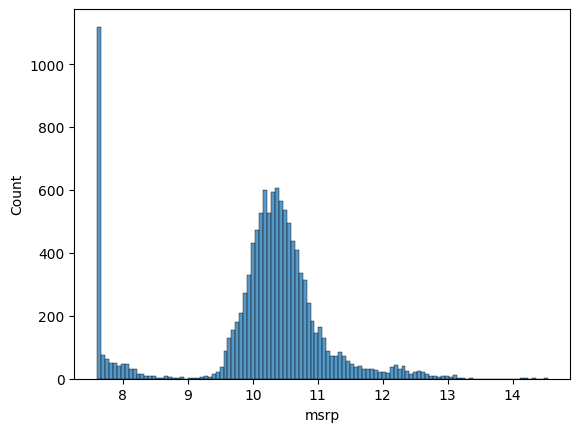

In [176]:
log_price = np.log1p(df.msrp)
sns.histplot(log_price)

###The target variable approximately has a normal distribution. So linear regression model would perform well.

### Now we can check for any missing values

In [177]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### We see that the target variable doesn't have any missing values. But, we have many missing values in in market_category.

In [178]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [182]:
df_data = df[['engine_hp', 'engine_cylinders', 'popularity', 'highway_mpg', 'city_mpg', 'msrp']]
df_data = df_data.fillna(0)

### In this model we are only dealing with numerical data disregarding the categorical data

### Now we split our dataset as 20% going for test set and the remaining 80% is our training set.

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df_data, test_size = 0.2, random_state = 1)
y_train = X_train[['msrp']]
y_train = np.log1p(y_train)
y_test = X_test[['msrp']]
y_test = np.log1p(y_test)

### To remove the null values that we had encountered earlier in columns we do the following. This way, we don’t lose the information in other columns and still can make predictions, even if the row has missing values.

## Now we can train our model and make prdictions

In [184]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [185]:
mean_squared_error(y_pred, y_test)

0.5037686170882805